consider y(x) = (8 x, 15 x)
want to build a simple model with 1 hidden layer, to test if the model works correctly

In [38]:
# test forward
import debugger as deb
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)

layers = np.array([2,3,2])
weights = [np.array([[1,1],[2,2],[3,3]]), np.array([[1,2,3],[4,5,6]])]
biases = [np.array([0,0,0]), np.array([0,0])]

model_0 = network0.network(layers=layers, weights=weights, biases=biases)

model_0.forward(np.array([10,-1.2354236]))


([array([10.       , -1.2354236]),
  array([ 8.7645764, 17.5291528, 26.2937292]),
  array([122.7040696, 280.4664448])],
 [array([10.       , -1.2354236]),
  array([ 8.7645764, 17.5291528, 26.2937292]),
  array([122.7040696, 280.4664448])])

In [2]:
def get_rand():
    x = np.random.random()
    y = np.random.random()
    return [x,x]

def create_data(len):
    np.random.seed(42)
    ret = []
    ret.append(np.array([np.array(get_rand()) for i in range(len)]))
    ret.append(np.array([np.array([8*sub[0], 15*sub[1]]) for sub in ret[0]]))
    return ret

epoch: 0 | loss: 0.026847840528874945
epoch: 1 | loss: 0.018243133167452213
epoch: 2 | loss: 0.013163367495792942
epoch: 3 | loss: 0.009903370515270899
epoch: 4 | loss: 0.007679848746326534
epoch: 5 | loss: 0.006092995771709719
epoch: 6 | loss: 0.004920375128372224
epoch: 7 | loss: 0.0040295194506747714
epoch: 8 | loss: 0.0033371883088482578
epoch: 9 | loss: 0.002788802311916625
epoch: 10 | loss: 0.0023473417780790896
epoch: 11 | loss: 0.0019870021208699016
epoch: 12 | loss: 0.0016893858654799762
epoch: 13 | loss: 0.0014411197166736872
epoch: 14 | loss: 0.0012323104561597325
epoch: 15 | loss: 0.0010555158077073263
epoch: 16 | loss: 0.0009050434520670209
epoch: 17 | loss: 0.0007764658795568241
epoch: 18 | loss: 0.0006662808388355463
epoch: 19 | loss: 0.000571671825779269
epoch: 20 | loss: 0.0004903381340524243
epoch: 21 | loss: 0.00042037358297867985
epoch: 22 | loss: 0.00036017938302578266
epoch: 23 | loss: 0.0003084009327206059
epoch: 24 | loss: 0.00026388136987275855
epoch: 25 | loss

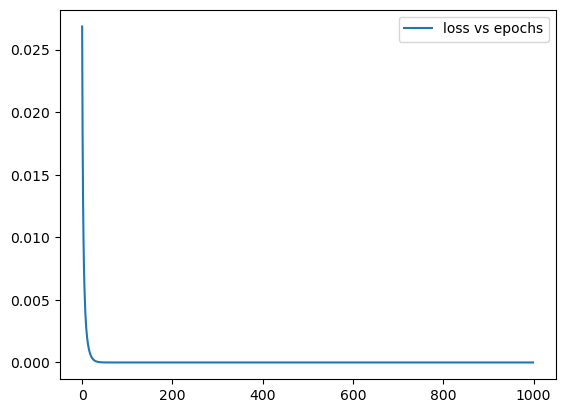

[16. 30.]


In [25]:
# test SGD
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)
#create data
random.seed(42)


layers = np.array([2,3,2])
train_data = create_data(100)
validation_data = create_data(100)

# print(train_data[:10])
# print(validation_data[:10])
# for such models of course sigmoid will not work, since its activation will be below 1
net = network0.network(layers=layers, activation_function=network0.ReLU, dactivation_function=network0.dReLU, seed_value=42)
net.SGD(train_data=train_data, eta=0.01, epochs=1000, batch_size=10, loss_fn=network0.mean_square_error, dloss_fn=network0.dmean_square_error, seed_value=10, report=True, validation_data=validation_data)


print(net.forward(np.array([2,2])))


In [31]:
net.forward(np.array([10,10]))

print(net.weights)
print(net.biases)

[array([[5.49596383, 6.07213802],
       [2.63268637, 2.49935091],
       [1.66145752, 1.6614334 ]]), array([[0.07433834, 1.00162642, 0.60178394],
       [0.85387447, 0.35087756, 0.99960441]])]
[array([0.79248168, 0.35667943, 0.20119664]), array([-0.53724822, -1.00294774])]


In [37]:
test = create_data(5)
print(type(test[0][0]))
print(test[0][0])
print(test)

<class 'numpy.ndarray'>
[0.37454012 0.37454012]
[array([[0.37454012, 0.37454012],
       [0.95071431, 0.95071431],
       [0.73199394, 0.73199394],
       [0.59865848, 0.59865848],
       [0.15601864, 0.15601864]]), array([[ 2.99632095,  5.61810178],
       [ 7.60571445, 14.2607146 ],
       [ 5.85595153, 10.97990913],
       [ 4.78926787,  8.97987726],
       [ 1.24814912,  2.34027961]])]


In [89]:
# test backpropagation
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)

layers = np.array([2,3,2])
weights = [np.array([[1,1],[2,2],[3,3]]), np.array([[1,2,3],[4,5,6]])]
biases = [np.array([0,0,0]), np.array([0,0])]
test_model = network0.network(layers=layers, weights=weights, biases=biases, activation_function=network0.sigmoid, dactivation_function=network0.dsigmoid)

print(test_model.weights)
print("---")
print(test_model.biases)

# test_model.forward(np.array([2.99632095, 5.61810178]))

train_data=create_data(1)
# print(f"train_data: {train_data}")

test_model.SGD(train_data=train_data, eta=0.1, epochs=1, batch_size=1, loss_fn=network0.mean_square_error, dloss_fn=network0.dmean_square_error)
print("compare")
print(test_model.weights)
print(test_model.biases)
test_model.safe_model("test_model.json")
#test_model.backpropagation(X=np.array([0.37454012, 0.37454012]), y=np.array([2.99632095, 5.61810178]), dloss_fn=network0.dmean_square_error)

[array([[1, 1],
       [2, 2],
       [3, 3]]), array([[1, 2, 3],
       [4, 5, 6]])]
---
[array([0, 0, 0]), array([0, 0])]
compare
[array([[1.0001066 , 1.0001066 ],
       [2.00014567, 2.00014567],
       [3.0001264 , 3.0001264 ]]), array([[1.00088045, 2.00105982, 3.00117278],
       [4.00000153, 5.00000184, 6.00000204]])]
[array([0.00028461, 0.00038894, 0.00033748]), array([1.29672759e-03, 2.25694954e-06])]


In [47]:
for i in range(0,1,1):
    print(i)

1

In [3]:
import importlib
import network0
import numpy as np
import random
importlib.reload(network0)

layers = np.array([2,3,5,2])
test_model = network0.network(layers=layers, activation_function=network0.sigmoid, dactivation_function=network0.dsigmoid, seed_value=17)

print(test_model.weights)
print("---")
print(test_model.biases)

# test_model.forward(np.array([2.99632095, 5.61810178]))

train_data=create_data(1)
# print(f"train_data: {train_data}")

test_model.SGD(train_data=train_data, eta=0.1, epochs=1, batch_size=1, loss_fn=network0.mean_square_error, dloss_fn=network0.dmean_square_error)
print("compare")
print(f"weights: {test_model.weights}")
print(f"biases: {test_model.biases}")

[array([[0.294665  , 0.53058676],
       [0.19152079, 0.06790036],
       [0.78698546, 0.65633352]]), array([[0.6375209 , 0.57560289, 0.03906292],
       [0.3578136 , 0.94568319, 0.06004468],
       [0.8640421 , 0.87729053, 0.05119367],
       [0.65241862, 0.55175137, 0.59751325],
       [0.48352862, 0.28298816, 0.29772572]]), array([[0.56150891, 0.39604744, 0.78870071, 0.41848439, 0.14390392],
       [0.15090669, 0.05524135, 0.71803719, 0.29231735, 0.19877387]])]
---
[array([0.83136392, 0.56799112, 0.08233975]), array([0.54499857, 0.15895874, 0.67676239, 0.11847226, 0.44499607]), array([0.88798243, 0.79726773])]
compare
weights: [array([[0.29530212, 0.53122387],
       [0.19229911, 0.06867868],
       [0.78723594, 0.656584  ]]), array([[0.63917637, 0.5770457 , 0.04048489],
       [0.35885521, 0.94659098, 0.06093937],
       [0.86781185, 0.88057599, 0.0544317 ],
       [0.65482396, 0.55384772, 0.59957933],
       [0.48511628, 0.28437186, 0.29908944]]), array([[0.5707025 , 0.40457625, 0